In [1]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from datetime import date, timedelta
from pandas import DataFrame
import sqlalchemy as sq
import numpy as np 
import math
import time
import scipy as scipy
from scipy import stats
import seaborn as sns
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from modelselector import EstimatorSelectionHelper

from sklearn import svm
from ggplot import *
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBRegressor
import gc

Using Theano backend.


In [2]:
mape=pd.read_csv('/data/pratik/tensor/summary/models_summary.csv',error_bad_lines=False)

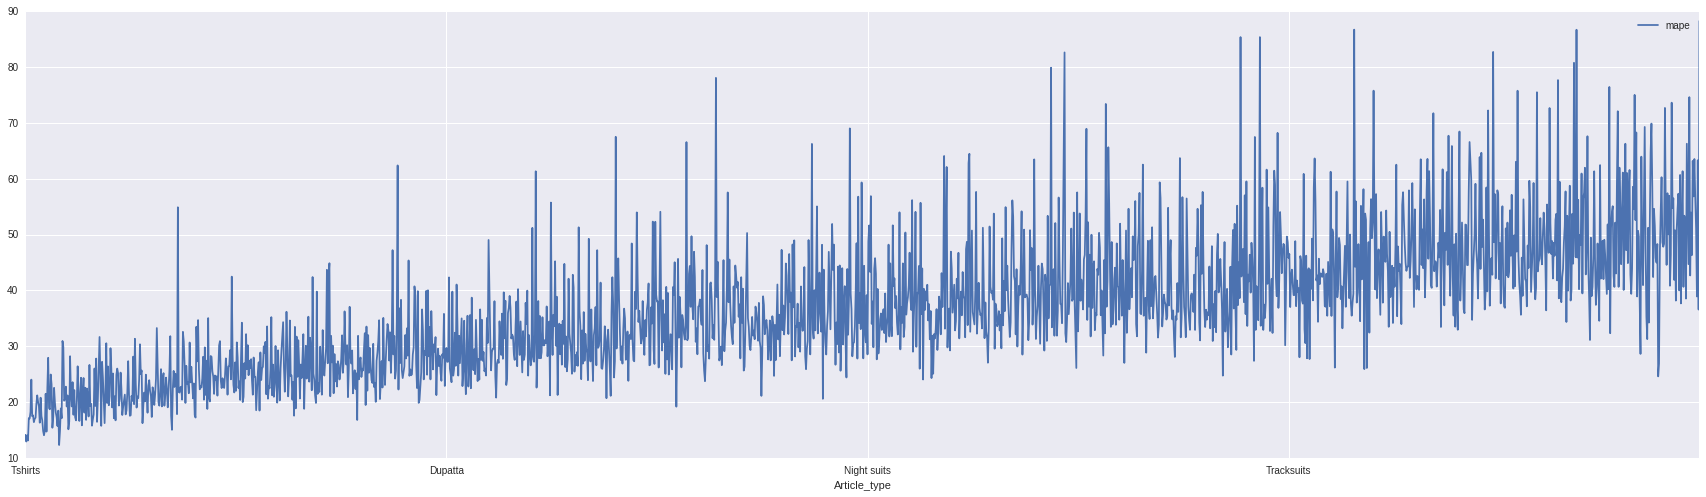

In [3]:
#mape.plot(0,figsize=(30, 8))
mape[mape['mape']<100].plot(0,figsize=(30, 8))

In [40]:
mape[(mape['mape']<100) & (mape['mape']>50)].head()

TypeError: 'function' object has no attribute '__getitem__'

In [5]:
data=pd.read_csv('/data/pratik/tensor/ad_clean_year.csv',error_bad_lines=False)
#data2=pd.read_csv('/data/pratik/tensor/sessions.csv',error_bad_lines=False)
#data=data1.merge(data2,how='left',on='date')

In [6]:
bag_summary=data.groupby(['brand','article_type','gender']).agg({'qty_sold' : np.sum})
bag_summary.reset_index(inplace=True)
bag_summary.sort_values(by='qty_sold',ascending=False,inplace=True)
bag_summary[180:190]

brand   article_type  gender  qty_sold
7443                   Harpa        Dresses   Women     33918
7869                   IMARA           Tops   Women     33749
14288           Raymond Home      Bedsheets  Unisex     33564
5038              DressBerry        Watches   Women     33412
19585          Zaveri Pearls  Jewellery Set   Women     33238
11036         Mast & Harbour        Dresses   Women     33174
7724             Hubberholme    Track Pants     Men     32996
3496          Carlton London          Flats   Women     32822
13843                   Puma    Sweatshirts     Men     32695
7296   HRX by Hrithik Roshan   Casual Shoes     Men     32603

In [23]:
ad=data[(data['brand']=='WROGN') & (data['article_type']=='Jackets') & (data['gender']=='Men') ]

In [8]:
univariate=ad.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()
#univariate.to_csv('/tmp/metrics_list.csv',index=False)
univariate

count          mean           std           min  \
date               362.0  2.016506e+07  4.696679e+03  2.016060e+07   
qty_sold           362.0  4.148066e+01  3.600809e+01  5.000000e+00   
live_styles        362.0  1.270000e+02  2.933416e+01  6.000000e+00   
list_count         362.0  1.543853e+05  1.246817e+05  4.193000e+03   
inventory          362.0  2.740842e+05  2.915988e+06  1.540000e+02   
input_td           362.0  4.896912e+01  1.030185e+01  0.000000e+00   
output_td          362.0  5.459101e-01  5.906684e-02  1.719305e-01   
output_cd          362.0  8.859534e-03  1.169248e-02  0.000000e+00   
return_perc        362.0  2.138433e-01  9.487338e-02  0.000000e+00   
brokeness          362.0  2.911983e-01  1.204347e-01  8.264463e-03   
freshness          362.0  1.918361e-01  1.478344e-01  0.000000e+00   
lp_pdp_conversion  362.0  2.757130e-02  7.282744e-02  0.000000e+00   
lc_share_pltf      362.0  3.348591e-02  2.259975e-02  5.092108e-03   
sessions           362.0  3.180978e+06  5.231164e+05  1.227610e+06   

                             1%            5%           10%           15%  \
date               2.016060e+07  2.016062e+07  2.016071e+07  2.016073e+07   
qty_sold           7.000000e+00  9.000000e+00  1.200000e+01  1.400000e+01   
live_styles        2.400000e+01  6.805000e+01  9.700000e+01  1.030000e+02   
list_count         3.128805e+04  5.106335e+04  5.959650e+04  6.793065e+04   
inventory          2.495400e+02  2.579150e+03  3.186700e+03  3.459200e+03   
input_td           0.000000e+00  3.626469e+01  4.111924e+01  4.284738e+01   
output_td          4.213291e-01  4.543909e-01  4.818855e-01  4.940627e-01   
output_cd          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
return_perc        0.000000e+00  5.412913e-02  9.539171e-02  1.250000e-01   
brokeness          6.284500e-02  1.058654e-01  1.274510e-01  1.498870e-01   
freshness          0.000000e+00  2.975071e-02  4.016667e-02  6.344771e-02   
lp_pdp_conversion  1.253894e-02  1.460717e-02  1.594328e-02  1.712976e-02   
lc_share_pltf      7.367997e-03  1.135401e-02  1.391101e-02  1.486305e-02   
sessions           2.101841e+06  2.485673e+06  2.682512e+06  2.758556e+06   

                            20%           30%           40%           50%  \
date               2.016082e+07  2.016092e+07  2.016110e+07  2.016121e+07   
qty_sold           1.700000e+01  2.300000e+01  2.640000e+01  3.200000e+01   
live_styles        1.050000e+02  1.166000e+02  1.240000e+02  1.300000e+02   
list_count         7.439260e+04  9.577460e+04  1.128968e+05  1.298215e+05   
inventory          3.758600e+03  4.296600e+03  4.966400e+03  6.135500e+03   
input_td           4.437591e+01  4.749641e+01  4.952916e+01  5.095238e+01   
output_td          5.056028e-01  5.210341e-01  5.339558e-01  5.459972e-01   
output_cd          1.331366e-04  1.586995e-03  3.475209e-03  4.821489e-03   
return_perc        1.366771e-01  1.788462e-01  2.000000e-01  2.142857e-01   
brokeness          1.881118e-01  2.333333e-01  2.623321e-01  2.955260e-01   
freshness          7.462687e-02  9.171769e-02  1.128866e-01  1.217391e-01   
lp_pdp_conversion  1.821662e-02  1.957153e-02  2.086731e-02  2.232551e-02   
lc_share_pltf      1.584018e-02  2.087376e-02  2.425791e-02  2.741342e-02   
sessions           2.840223e+06  2.932221e+06  3.047362e+06  3.131113e+06   

                            60%           70%           80%           90%  \
date               2.017012e+07  2.017023e+07  2.017040e+07  2.017051e+07   
qty_sold           3.800000e+01  4.800000e+01  5.800000e+01  7.600000e+01   
live_styles        1.360000e+02  1.420000e+02  1.530000e+02  1.579000e+02   
list_count         1.434844e+05  1.702259e+05  2.020074e+05  2.507520e+05   
inventory          8.081000e+03  8.932400e+03  1.257580e+04  1.800090e+04   
input_td           5.245493e+01  5.348844e+01  5.529035e+01  5.768506e+01   
output_td          5.565235e-01  5.687518e-01  5.843733e-01  6.167582e-01   
output_cd          7.421018e-03  1.01966

In [24]:
ad.sort_values(by='date',inplace=True)
ad['input_td']=ad['input_td'].clip(ad['input_td'].quantile(0.02),ad['input_td'].quantile(0.98))
#ad['lp_screens']=ad['lp_screens'].clip(ad['lp_screens'].quantile(0.02),ad['lp_screens'].quantile(0.98))
#ad['pi_lag']=ad['pi_score'].shift(1)
#ad['pi_rm']=ad['pi_score'].rolling(15, min_periods=1).mean()
ad['input_td_diff']=ad['input_td']/ad['input_td'].rolling(15, min_periods=1).mean()
ad['output_td_diff']=ad['output_td']/ad['output_td'].rolling(15, min_periods=1).mean()
#ad['vis_tr']=ad['lc_share_pltf']*ad['sessions']/100
ad['presale_flag']=0
ad.loc[ad['date'].isin([20170125,20170407,20170513,20160701,20161001,20161021]),'presale_flag']=1
#ad['pr_vis']=ad['lc_share_pltf']*ad['output_td']
ad.fillna(0,inplace=True)
#ad[['pi_score','pi_lag','pi_rm']]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Std in dependent: 57.48


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


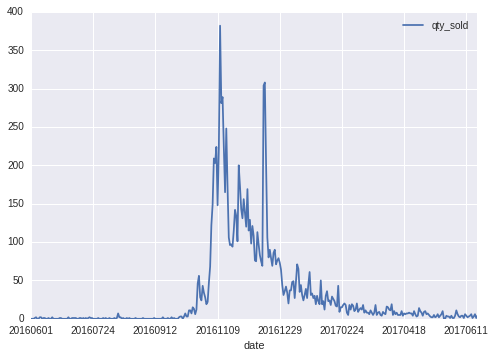

In [25]:
ad.sort_values(by='date',inplace=True)
ad.date = ad.date.astype(str)
print ('Std in dependent: %.2f' % ad.qty_sold.std())
ad.plot(x="date", y="qty_sold", kind="line")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98a3786e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f98a33e9410>], dtype=object)

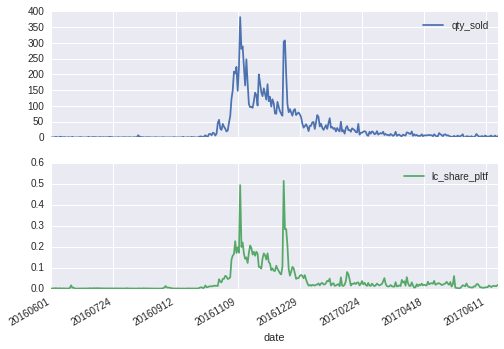

In [26]:
bi=ad[['date','qty_sold','lc_share_pltf']]
bi.set_index('date',inplace=True)
#data_roadster_tshirts.plot(x="date", y="total_units",secondary_y="lv_share", kind="line")
bi.plot(subplots=True)

In [ ]:
for i in d._get_numeric_data().columns:
    sns.jointplot(x=i, y="qty_sold", data=ad,kind="reg")

In [27]:
ad.head()

date  brand article_type gender  qty_sold  live_styles  \
1640252  20160601  WROGN      Jackets    Men         0            8   
3890348  20160602  WROGN      Jackets    Men         0            8   
1955306  20160603  WROGN      Jackets    Men         0            8   
3053930  20160604  WROGN      Jackets    Men         1            8   
2817495  20160605  WROGN      Jackets    Men         2            8   

         list_count  inventory  input_td  output_td  output_cd  return_perc  \
1640252         771        220      30.0        0.0       0.00          0.0   
3890348        1548        220      30.0        0.0       0.00          0.0   
1955306        2460        220      30.0        0.0       0.00          0.0   
3053930        3810        220      40.0        0.4       0.12          0.0   
2817495        6306        220      40.0        0.4       0.00          0.0   

         brokeness  freshness  lp_pdp_conversion  lc_share_pltf   sessions  \
1640252      0.625        0.0           0.054475       0.000346  2994256.0   
3890348      0.625        0.0           0.029716       0.000727  2968840.0   
1955306      0.625        0.0           0.022358       0.001625  2912697.0   
3053930      0.625        0.0           0.041207       0.001505  3154509.0   
2817495      0.625        0.0           0.021250       0.002303  3305432.0   

         input_td_diff  output_td_diff  presale_flag  
1640252       1.000000             0.0             0  
3890348       1.000000             0.0             0  
1955306       1.000000             0.0             0  
3053930       1.230769             4.0             0  
2817495       1.176471             2.5             0

In [ ]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

X=ad.drop(['date','brand','article_type','gender','qty_sold','list_count','lp_pdp_conversion'],axis=1)
Y=ad[['qty_sold']]

# Create the RFE object and compute a cross-validated score.
svc = LinearSVC(C=0.25, penalty="l1", dual=False)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=10, scoring=mape_scorer,n_jobs=-1)
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
a=rfecv.get_support(indices=True)
X[a].columns

In [159]:
X=ad.drop(['date','brand','article_type','gender','qty_sold','list_count','lp_pdp_conversion','return_perc','output_td_diff'],axis=1)
Y=ad[['qty_sold']]

est = LinearSVC(penalty="l1", dual=False).fit(X,Y.as_matrix())
#est=LassoCV(cv=10,selection='random').fit(X,Y.as_matrix())
model = SelectFromModel(est, prefit=True)
i=model.get_support(indices=True)
features_select=X[i].columns.tolist()
features_select.extend(['date', 'qty_sold'])
ad[features_select].head()

live_styles  inventory   input_td  output_td  brokeness  freshness  \
2576898           35       3559   9.714286   0.227700   0.400000   0.657143   
627758            34       3561   9.852941   0.184075   0.441176   0.676471   
2856782           34       3558   9.852941   0.151648   0.441176   0.676471   
3942533           35       3545  10.285714   0.135575   0.485714   0.657143   
3784031           34       3549   9.852941   0.174060   0.441176   0.676471   

         lc_share_pltf   sessions  input_td_diff  presale_flag      date  \
2576898       0.020050  2994256.0       1.000000             0  20160601   
627758        0.037571  2968840.0       1.007086             0  20160602   
2856782       0.026366  2912697.0       1.004713             0  20160603   
3942533       0.024236  3154509.0       1.036190             0  20160604   
3784031       0.022920  3305432.0       0.994065             0  20160605   

         qty_sold  
2576898        26  
627758         37  
2856782        26  
3942533        29  
3784031        28

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
d=ad[['date','qty_sold','output_td','output_td_diff','lc_share_pltf','live_styles','presale_flag','sessions','brokeness','freshness']]
      #,'lc_share_pltf','lp_screens','pi_rm'
      #,'live_styles','presale_flag','sessions'
      #'output_cd','sessions','brokeness','styles_age_180plus','live_styles','lp_pdp_conversion']]
#d=ad[features_select]
train, test= train_test_split(d, test_size=0.2, random_state=0)
y_train = train.qty_sold
X_train = train.drop(['qty_sold','date'],axis=1)

y_test = test.qty_sold
X_test = test.drop(['qty_sold','date'],axis=1)

In [29]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
models1 = { 
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor()
}

params1 = { 
    'LinearRegression': { },
    'RandomForestRegressor': { 'n_estimators':[50,100,200],'max_depth':[3,4,5,6] ,'random_state':[0]},
    'GradientBoostingRegressor':  { 'n_estimators':[50,100,200],'max_depth':[3,4,5,6] ,'random_state':[0]},
    'XGBRegressor': { 'booster':['gbtree', 'gblinear'] }
}

In [31]:
mape_scorer=make_scorer(mape,greater_is_better=False)
selection= EstimatorSelectionHelper(models1, params1)
selection.fit(X_train,y_train, cv=10, n_jobs=-1,scoring=mape_scorer)
gs_eval=selection.score_summary()
gs_eval.reset_index(inplace=True)
gs_eval.drop('index',axis=1,inplace=True)
best_est=gs_eval.loc[0,'estimator']
gs_eval

Running GridSearchCV for GradientBoostingRegressor.
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Running GridSearchCV for LinearRegression.
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


Running GridSearchCV for XGBRegressor.
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
/usr/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthr

Running GridSearchCV for RandomForestRegressor.
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/lib/python2.7/site-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.9s finished
/usr/lib64/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn

estimator min_score mean_score max_score std_score  \
0   GradientBoostingRegressor      -inf       -inf      -inf       NaN   
1                XGBRegressor      -inf       -inf      -inf       NaN   
2       RandomForestRegressor      -inf       -inf      -inf       NaN   
3       RandomForestRegressor      -inf       -inf      -inf       NaN   
4       RandomForestRegressor      -inf       -inf      -inf       NaN   
5       RandomForestRegressor      -inf       -inf      -inf       NaN   
6       RandomForestRegressor      -inf       -inf      -inf       NaN   
7       RandomForestRegressor      -inf       -inf      -inf       NaN   
8       RandomForestRegressor      -inf       -inf      -inf       NaN   
9       RandomForestRegressor      -inf       -inf      -inf       NaN   
10      RandomForestRegressor      -inf       -inf      -inf       NaN   
11      RandomForestRegressor      -inf       -inf      -inf       NaN   
12      RandomForestRegressor      -inf       -inf      -inf       NaN   
13               XGBRegressor      -inf       -inf      -inf       NaN   
14  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
15           LinearRegression      -inf       -inf      -inf       NaN   
16  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
17  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
18  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
19  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
20  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
21  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
22  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
23  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
24  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
25  GradientBoostingRegressor      -inf       -inf      -inf       NaN   
26      RandomForestRegressor      -inf       -inf      -inf       NaN   

     booster max_depth n_estimators random_state  
0        NaN         3           50            0  
1   gblinear       NaN          NaN          NaN  
2        NaN         6          100            0  
3        NaN         6           50            0  
4        NaN         5          200            0  
5        NaN         5          100            0  
6        NaN         5           50            0  
7        NaN         4          200            0  
8        NaN         4          100            0  
9        NaN         4           50            0  
10       NaN         3          200            0  
11       NaN         3          100            0  
12       NaN         3           50            0  
13    gbtree       NaN          NaN          NaN  
14       NaN         3          100            0  
15       NaN       NaN          NaN          NaN  
16       NaN         6          200            0  
17       NaN         6          100            0  
18       NaN         6           50            0  
19       NaN         5          200            0  
20       NaN         5          100            0  
21       NaN         5           50            0  
22       NaN         4          200            0  
23       NaN         4          100            0  
24       NaN         4           50            0  
25       NaN         3          200            0  
26       NaN         6          200            0

In [16]:
best_est

'GradientBoostingRegressor'

Manual Validation MAPE: 58.23


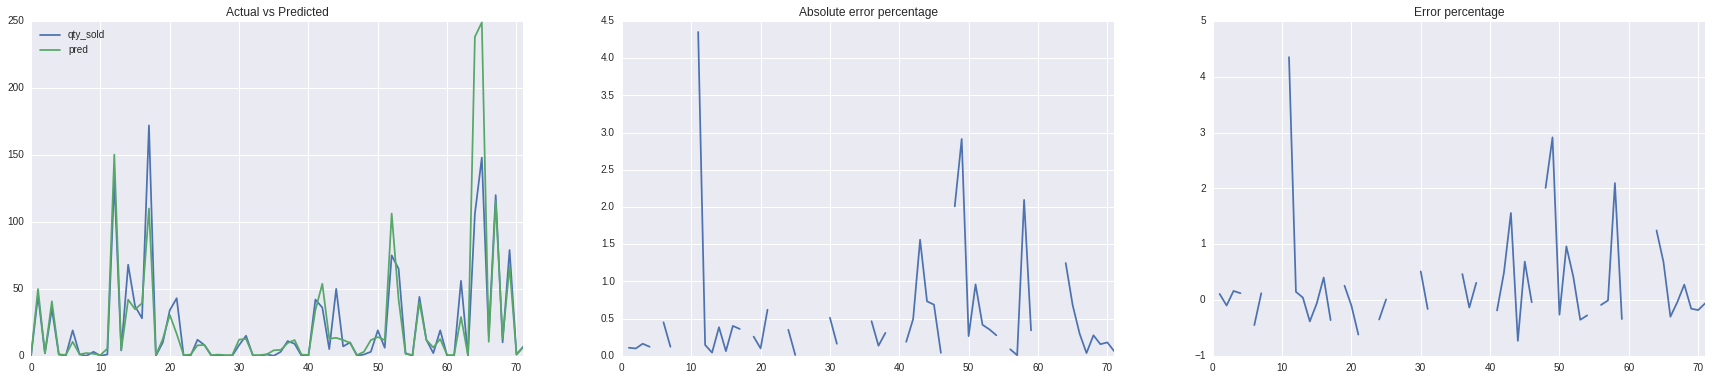

In [32]:
best_estim=selection.grid_searches[best_est].best_estimator_
print( 'Manual Validation MAPE: %0.2f' % mape(best_estim.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(best_estim.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['pred'] - pred['qty_sold']) / pred['qty_sold'])
pred['ae']=(pred['pred'] - pred['qty_sold']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

Automated Validation MAPE: 24.47


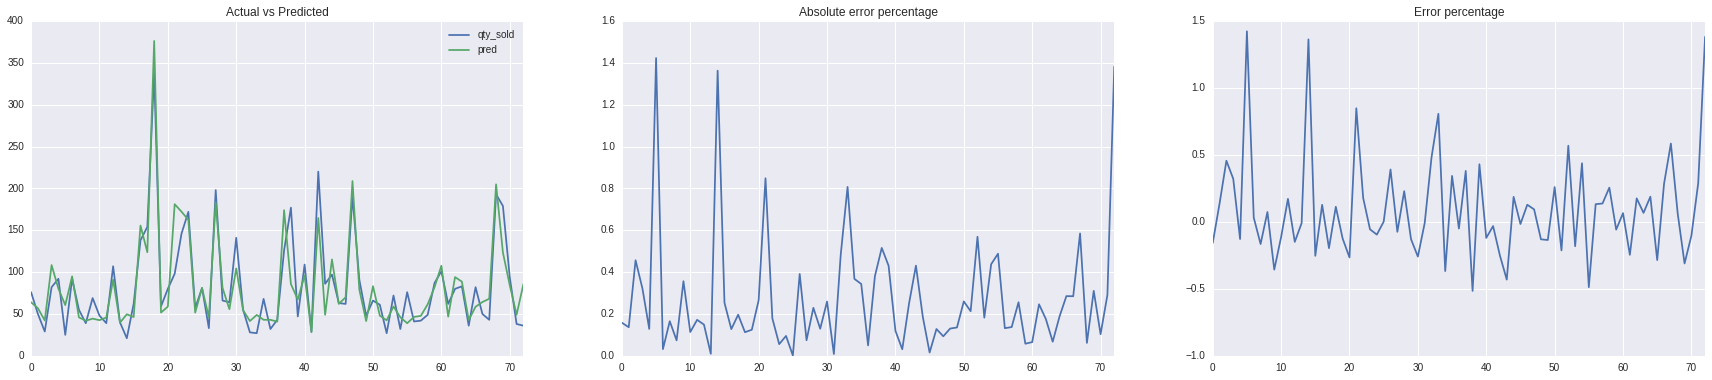

In [165]:
best_estim=selection.grid_searches[best_est].best_estimator_
print( 'Automated Validation MAPE: %0.2f' % mape(best_estim.predict(X_test), y_test))
pred=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(best_estim.predict(X_test),columns=['pred'])], axis=1)
pred['ape']=np.abs((pred['pred'] - pred['qty_sold']) / pred['qty_sold'])
pred['ae']=(pred['pred'] - pred['qty_sold']) / pred['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

In [33]:
test_est='LinearRegression'

Validation MAPE: 73.85


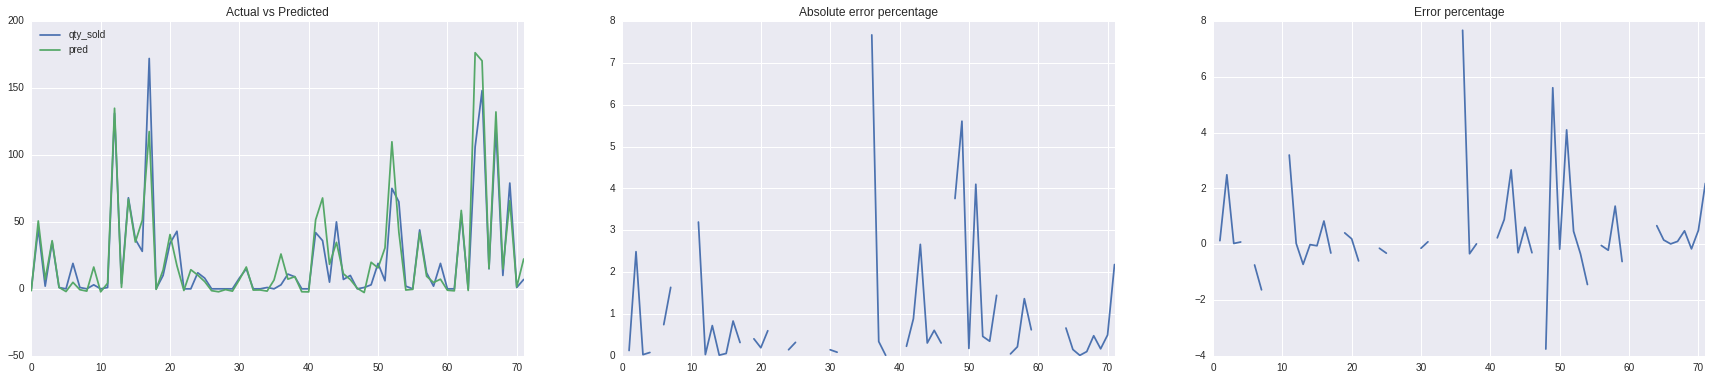

In [34]:
test_estim=selection.grid_searches[test_est].best_estimator_
print( 'Validation MAPE: %0.2f' % mape(test_estim.predict(X_test), y_test))
pred2=pd.concat([test.date.reset_index(),y_test.reset_index(),pd.DataFrame(test_estim.predict(X_test),columns=['pred'])], axis=1)
pred2['ape']=np.abs((pred2['pred'] - pred2['qty_sold']) / pred2['qty_sold'])
pred2['ae']=(pred2['pred'] - pred2['qty_sold']) / pred2['qty_sold']
fig, axs = plt.subplots(ncols=3,figsize=(30, 6))
pred2[['qty_sold','pred']].plot(kind='line',ax=axs[0],title="Actual vs Predicted")
pred2['ape'].plot(kind='line',ax=axs[1],title="Absolute error percentage")
pred2['ae'].plot(kind='line',ax=axs[2],title="Error percentage")

In [35]:
a=pred.drop('index',axis=1).merge(d.drop('qty_sold',axis=1),how='left',on='date')
b=pred2.drop('index',axis=1).merge(d.drop('qty_sold',axis=1),how='left',on='date')

In [36]:
a[a['ape']>1]

date  qty_sold        pred       ape        ae  output_td  \
0   20160607         0    0.546161       inf       inf   0.000000   
5   20160928         0    0.546161       inf       inf   0.000000   
8   20160711         0    2.051397       inf       inf   0.000000   
10  20160627         0    0.546161       inf       inf   0.000000   
11  20170616         1    5.352197  4.352197  4.352197   0.400000   
18  20160808         0    0.546161       inf       inf   0.000000   
22  20160719         0    0.546161       inf       inf   0.000000   
23  20161010         0    0.900519       inf       inf   0.000000   
26  20160819         0    0.546161       inf       inf   0.000000   
27  20160821         0    0.900519       inf       inf   0.000000   
28  20160616         0    0.546161       inf       inf   0.000000   
29  20160913         0    0.546161       inf       inf   0.000000   
32  20160726         0    0.546161       inf       inf   0.000000   
33  20160729         0    0.546161       inf       inf   0.000000   
35  20160904         0    4.112564       inf       inf   0.000000   
39  20160926         0    0.900519       inf       inf   0.000000   
40  20160621         0    0.546161       inf       inf   0.000000   
43  20170301         5   12.800974  1.560195  1.560195   0.360606   
47  20160811         0    0.546161       inf       inf   0.000000   
48  20160817         1    3.008672  2.008672  2.008672   0.450000   
49  20170509         3   11.744044  2.914681  2.914681   0.380908   
55  20160807         0    0.546161       inf       inf   0.000000   
58  20170510         2    6.190134  2.095067  2.095067   0.350000   
60  20160802         0    0.546161       inf       inf   0.000000   
61  20160914         0    0.546161       inf       inf   0.000000   
63  20160730         0    0.546161       inf       inf   0.000000   
64  20161219       106  238.151379  1.246711  1.246711   0.288439   

    output_td_diff  lc_share_pltf  live_styles  presale_flag   sessions  \
0         0.000000       0.001455            8             0  2864965.0   
5         0.000000       0.000530            6             0  3172401.0   
8         0.000000       0.002170            7             0  3622327.0   
10        0.000000       0.000765            8             0  3157253.0   
11        0.971691       0.012148           19             0  3869589.0   
18        0.000000       0.000624            7             0  2362431.0   
22        0.000000       0.000986            7             0  2663742.0   
23        0.000000       0.002244            9             0  3460434.0   
26        0.000000       0.000931            6             0  2930936.0   
27        0.000000       0.000660            6             0  3369660.0   
28        0.000000       0.002381            8             0  2789995.0   
29        0.000000       0.000842            6             0  3135424.0   
32        0.000000       0.001097            7             0  2503669.0   
33        0.000000       0.000910            7             0  2856682.0   
35        0.000000       0.012681            6             0  3284480.0   
39        0.000000       0.000702            6             0  3380015.0   
40        0.000000       0.000415            8             0  3000172.0   
43        0.867249       0.027459           30             0  2841550.0   
47        0.000000       0.000540            7             0  1227610.0   
48        2.225697       0.001276            6             0  3057279.0   
49        0.965521       0.031472           27             0  2951379.0   
55        0.000000       0.000702            7             0  2413516.0   
58        0.899840       0.009903           27             0  2937136.0   
60        0.000000       0.000471            7             0  2775764.0   
61        0.000000       0.000960            6             0  3017005.0   
63        0.000000       0.000770            7             0  3045692.0   
64        1.431931       0.205337           25    

In [ ]:
ab=pd.DataFrame(selection.grid_searches[best_est].cv_results_)
ac=pd.DataFrame(selection.grid_searches[test_est].cv_results_)

In [ ]:
tes=mape_scorer(selection.grid_searches[test_est],X_test,y_test)
tes

In [ ]:
selection.grid_searches[best_est].best_score_

In [ ]:
ac[['params','mean_test_score','std_test_score']]